In [1]:
# Libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn import datasets


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing
from sklearn.cluster import KMeans

Task 1.

In [2]:
super_market = pd.read_csv('supermarket.csv', sep = ';')
print(super_market.head())
super_market.info()

  Branch Customer type  Gender  Quantity     Total      Payment   Income  \
0      A        Member  Female         7  548.9715      Ewallet  26.1415   
1      C        Normal  Female         5   80.2200         Cash   3.8200   
2      A        Normal    Male         7  340.5255  Credit card  16.2155   
3      A        Member    Male         8  489.0480      Ewallet  23.2880   
4      A        Normal    Male         7  634.3785      Ewallet  30.2085   

   Rating  
0     9.1  
1     9.6  
2     7.4  
3     8.4  
4     5.3  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   Customer type  1000 non-null   object 
 2   Gender         1000 non-null   object 
 3   Quantity       1000 non-null   int64  
 4   Total          1000 non-null   float64
 5   Payment        1000 non-null   object 
 6   Income   

In [3]:
# Checking descriptive statistics
# No missing values
super_market.describe()

,Quantity,Total,Income,Rating
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,5.510000,322.966749,15.379369,6.97270
std,2.923431,245.885335,11.708825,1.71858
min,1.000000,10.678500,0.508500,4.00000
25%,3.000000,124.422375,5.924875,5.50000
50%,5.000000,253.848000,12.088000,7.00000
75%,8.000000,471.350250,22.445250,8.50000
max,10.000000,1042.650000,49.650000,10.00000


In [4]:
# Based on correlations, among numeric measures Income seem to measure the same thing
super_market.corr().Total

Quantity    0.705510
Total       1.000000
Income      1.000000
Rating     -0.036442
Name: Total, dtype: float64

<AxesSubplot:xlabel='Income', ylabel='Total'>

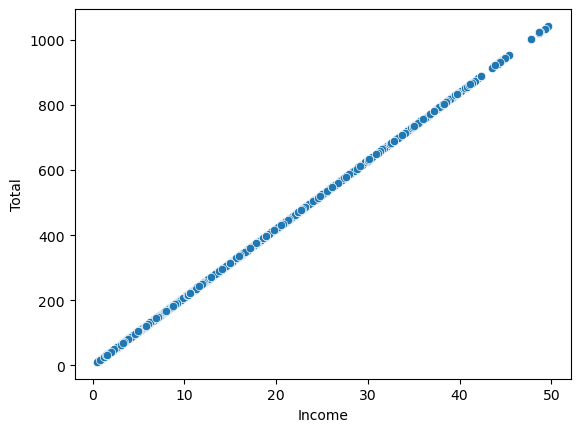

In [5]:
# Scatterplot with Income
sns.scatterplot(x = 'Income', y = 'Total', data = super_market)

<AxesSubplot:xlabel='Total', ylabel='Branch'>

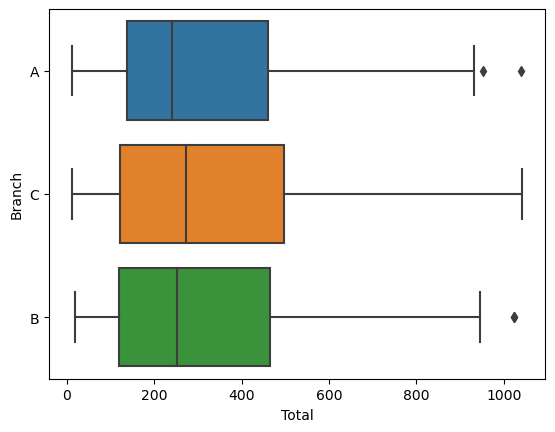

In [6]:
# Total seems to be similar across branches
sns.boxplot(x = 'Total', y = 'Branch', data = super_market)

<AxesSubplot:xlabel='Rating', ylabel='Total'>

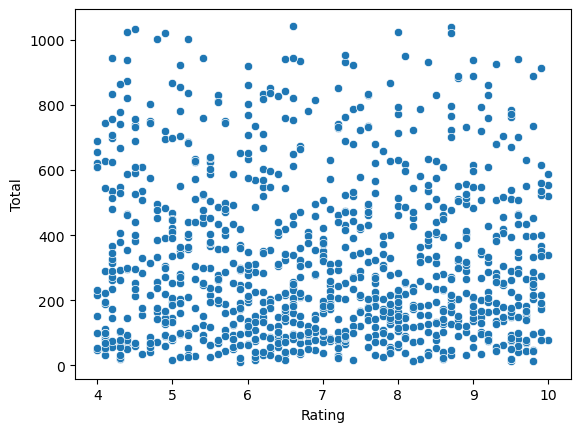

In [7]:
# Rating seems to show no patter, as expected based on correlation already
sns.scatterplot(x = 'Rating', y = 'Total', data = super_market)

In [8]:
# Some aggregated values, there seem to be no real difference across categories
print(super_market.groupby('Branch').Total.mean())
print(super_market.groupby('Customer type').Total.mean())
print(super_market.groupby('Gender').Total.mean())

Branch
A    312.354031
B    319.872506
C    337.099715
Name: Total, dtype: float64
Customer type
Member    327.791305
Normal    318.122856
Name: Total, dtype: float64
Gender
Female    335.095659
Male      310.789226
Name: Total, dtype: float64


In [ ]:
# Create dummy variables for modelling
super_market = pd.get_dummies(super_market, columns=['Customer type', 'Gender', 'Payment'], drop_first = True)

In [ ]:
# Creating train and test set
sm_train = super_market[super_market.Branch.isin(['A', 'B'])]
sm_test = super_market[super_market.Branch.isin(['C'])]

# Building the regression model
sm_train_X, sm_train_y = sm_train.drop(['Total', 'Branch'], axis = 1), sm_train.Total
sm_test_X, sm_test_y = sm_test.drop(['Total', 'Branch'], axis = 1), sm_test.Total

# Create the regression model

lm = linear_model.LinearRegression()
model = lm.fit(sm_train_X, sm_train_y)
predictions = lm.predict(sm_test_X)

# Perfect score for test set
model.score(sm_test_X, sm_test_y)

In [ ]:
# Create the regression model

reg_1 = sm.add_constant(sm_train_X)
est_1 = sm.OLS(sm_train_y, reg_1)
est_1fit = est_1.fit()


# The coefficients of Gender and Customer type are essentially 0, so there no real difference between the categories
print(est_1fit.summary())

Task 2.

In [ ]:
# Reading data and creating dummy variables
hotel = pd.read_csv('hotel.csv', sep = ';')
hotel = pd.get_dummies(hotel, columns=['room_type_reserved'], drop_first=True, prefix='romm')
hotel.head()

In [ ]:
# No missing values
hotel.info()

In [ ]:
# Descriptive statistics
hotel.describe()

In [ ]:
# Histogram for lead time
sns.histplot(data = hotel, x = 'lead_time')

In [ ]:
# Same for not canceled bookings
sns.histplot(data = hotel, x = 'no_of_previous_bookings_not_canceled')

In [ ]:
# Building the classification model

X_train, X_test, y_train, y_test = train_test_split(hotel.drop(['booking_status'], axis=1), hotel.booking_status, test_size=0.30, random_state=0)

# Build model

logistic_regression = LogisticRegression(solver = 'lbfgs', max_iter = 5000)

model_1 = logistic_regression.fit(X_train, y_train)

# Predict for train and test set

y_train_predict = logistic_regression.predict(X_train)
y_test_predict = logistic_regression.predict(X_test)

# Print results
# Results are almost identical for training and test set
# We can see that the results are much less reliable when the people who canceled are considered
print(metrics.classification_report(y_train, y_train_predict))

# Accuracy for test set is 78%, 771 false positives (Canceled is the positive in this case)
print(metrics.classification_report(y_test, y_test_predict))
print(confusion_matrix(y_test, y_test_predict))

Task 3.

In [ ]:
# Data for clustering
iris = pd.read_csv('iris.csv')
iris_clust = iris.drop('species',axis=1)

# Scale data
iris_clust = iris_clust.apply(lambda x: preprocessing.scale(x))
iris.head()

In [ ]:
sse_clust = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(iris_clust)
    sse_clust.append(kmeans.inertia_)
    
sse_clust

In [ ]:
# Based on the plot, 3 clusters seems reasonable

plt.plot(range(1, 11), sse_clust)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
# Creating model with three clusters

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)

y_clust = kmeans.fit_predict(iris_clust)

y_clust

In [ ]:
# Means of original variables for the clusters

iris.groupby(y_clust).mean()

In [ ]:
# Iris setosa is perfectly separated

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)

y_clust = kmeans.fit_predict(iris_clust)

pd.crosstab(iris.species, y_clust)

In [ ]:
# Sepal width seem to be the column that makes it more difficult to separate the other two species
iris.groupby('species').mean()